In [43]:
import pandas as pd
import yfinance as yf
import datetime as dt
import statsmodels.api as sm # per la regressione
import matplotlib.pyplot as plt
import getFamaFrenchFactors as gff
import seaborn as sns

In [44]:
end = dt.datetime.now()
start = dt.datetime(end.year - 6,end.month,end.day)
ticker = ['TSLA']

In [45]:
end

datetime.datetime(2024, 5, 15, 11, 47, 9, 291649)

In [46]:
start

datetime.datetime(2018, 5, 15, 0, 0)

In [47]:
tsla = yf.download(ticker, start, end, progress = False)

In [48]:
tsla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-05-15,19.000668,19.130667,18.700001,18.945333,18.945333,142788000
2018-05-16,18.922001,19.254000,18.770666,19.098667,19.098667,85110000
2018-05-17,19.059999,19.279333,18.931334,18.969334,18.969334,66309000
2018-05-18,18.976667,18.976667,18.266666,18.454666,18.454666,108778500
2018-05-21,18.755333,19.432667,18.753332,18.966000,18.966000,137739000


In [49]:
tsla =tsla.drop(['Open','High','Low','Close','Volume'], axis = 1)

In [50]:
tsla.head()

,Adj Close
Date,
2018-05-15,18.945333
2018-05-16,19.098667
2018-05-17,18.969334
2018-05-18,18.454666
2018-05-21,18.966000


In [51]:
tsla = tsla.resample("ME").last() # siccome il beta si calcola su base mensile si va a pescare il solo prezzo di chiusura a fine mese
tsla.head()

,Adj Close
Date,
2018-05-31,18.982000
2018-06-30,22.863333
2018-07-31,19.875999
2018-08-31,20.110666
2018-09-30,17.651333


__RICORDA__: non ha senso prendere come valore mensile la media dei prezzi di chiusura dei vari giorni del mese, perché la media non è un valore che si è realmente manifestato; per questo motivo si prende il prezzo di chiusura dell'ultimo giorno di ciascun mese.

In [52]:
tsla['Ret'] = tsla['Adj Close'].pct_change()
tsla

,Adj Close,Ret
Date,,
2018-05-31,18.982000,NaN
2018-06-30,22.863333,0.204474
2018-07-31,19.875999,-0.130660
2018-08-31,20.110666,0.011807
2018-09-30,17.651333,-0.122290
...,...,...
2024-01-31,187.289993,-0.246257
2024-02-29,201.880005,0.077901
2024-03-31,175.789993,-0.129235


In [53]:
tsla.dropna(inplace = True)
tsla

,Adj Close,Ret
Date,,
2018-06-30,22.863333,0.204474
2018-07-31,19.875999,-0.130660
2018-08-31,20.110666,0.011807
2018-09-30,17.651333,-0.122290
2018-10-31,22.488001,0.274011
...,...,...
2024-01-31,187.289993,-0.246257
2024-02-29,201.880005,0.077901
2024-03-31,175.789993,-0.129235


#### Scarichiamo il risk free dal DB di Fama e French

In [54]:
ff3_monthly = pd.DataFrame(gff.famaFrench3Factor(frequency='m'))
ff3_monthly

,date_ff_factors,Mkt-RF,SMB,HML,RF
0,1926-07-31,0.0296,-0.0256,-0.0243,0.0022
1,1926-08-31,0.0264,-0.0117,0.0382,0.0025
2,1926-09-30,0.0036,-0.0140,0.0013,0.0023
3,1926-10-31,-0.0324,-0.0009,0.0070,0.0032
4,1926-11-30,0.0253,-0.0010,-0.0051,0.0031
...,...,...,...,...,...
1168,2023-11-30,0.0884,-0.0002,0.0164,0.0044
1169,2023-12-31,0.0487,0.0634,0.0493,0.0043
1170,2024-01-31,0.0071,-0.0509,-0.0238,0.0047
1171,2024-02-29,0.0506,-0.0024,-0.0349,0.0042


In [55]:
ff3_monthly.columns

Index(['date_ff_factors', 'Mkt-RF', 'SMB', 'HML', 'RF'], dtype='object')

In [56]:
ff3_monthly.rename({'date_ff_factors': 'Date'}, axis=1, inplace=True)

In [57]:
ff3_monthly.head()

,Date,Mkt-RF,SMB,HML,RF
0,1926-07-31,0.0296,-0.0256,-0.0243,0.0022
1,1926-08-31,0.0264,-0.0117,0.0382,0.0025
2,1926-09-30,0.0036,-0.0140,0.0013,0.0023
3,1926-10-31,-0.0324,-0.0009,0.0070,0.0032
4,1926-11-30,0.0253,-0.0010,-0.0051,0.0031


In [58]:
ff3_monthly.set_index('Date', inplace = True)

In [59]:
ff3_monthly.head()

,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07-31,0.0296,-0.0256,-0.0243,0.0022
1926-08-31,0.0264,-0.0117,0.0382,0.0025
1926-09-30,0.0036,-0.0140,0.0013,0.0023
1926-10-31,-0.0324,-0.0009,0.0070,0.0032
1926-11-30,0.0253,-0.0010,-0.0051,0.0031


Nella colonna RF ci sono i rendimenti (tassi di interesse) risk-free: in questo caso il modello fa riferimento ai tassi di interesse relativi ai buoni del tesoro americani a breve termine (Treasury Bills). <br>
Mkt - RF invece è la colonna che rappresenta l'eccesso di ritorno del mercato, cioè la differenza tra il ritorno generabile assumendo rischi sul mercato e quello generabile senza rischi andando ad investire in strumenti risk-free.

#### Combiniamo i DF di FF con quello di Tesla

In [60]:
data = ff3_monthly.merge(tsla, on = 'Date')
data

,Mkt-RF,SMB,HML,RF,Adj Close,Ret
Date,,,,,,
2018-06-30,0.0048,0.0114,-0.0234,0.0014,22.863333,0.204474
2018-07-31,0.0319,-0.0222,0.0047,0.0016,19.875999,-0.130660
2018-08-31,0.0344,0.0114,-0.0394,0.0016,20.110666,0.011807
2018-09-30,0.0006,-0.0227,-0.0170,0.0015,17.651333,-0.122290
2018-10-31,-0.0768,-0.0478,0.0340,0.0019,22.488001,0.274011
...,...,...,...,...,...,...
2023-11-30,0.0884,-0.0002,0.0164,0.0044,240.080002,0.195379
2023-12-31,0.0487,0.0634,0.0493,0.0043,248.479996,0.034988
2024-01-31,0.0071,-0.0509,-0.0238,0.0047,187.289993,-0.246257


SMB è il fattore di rischio "Small minus Big", mentre HML è il fattore di rischio "High minus Low".

In [61]:
data.shape

(70, 6)

In [62]:
data = data.tail(60) # usa questo comando per tenere solo le ultime 60 righe e ranzare via le prime 10
data

,Mkt-RF,SMB,HML,RF,Adj Close,Ret
Date,,,,,,
2019-04-30,0.0397,-0.0174,0.0215,0.0021,15.912667,-0.147109
2019-05-31,-0.0694,-0.0132,-0.0237,0.0021,12.344000,-0.224266
2019-06-30,0.0693,0.0029,-0.0071,0.0018,14.897333,0.206848
2019-07-31,0.0119,-0.0193,0.0048,0.0019,16.107332,0.081223
2019-08-31,-0.0258,-0.0238,-0.0478,0.0016,15.040667,-0.066222
2019-09-30,0.0143,-0.0096,0.0675,0.0018,16.058001,0.067639
2019-10-31,0.0206,0.0029,-0.0191,0.0016,20.994667,0.307427
2019-11-30,0.0387,0.0077,-0.0202,0.0012,21.996000,0.047695
2019-12-31,0.0277,0.0073,0.0175,0.0014,27.888666,0.267897


#### Calcoliamo il beta di TESLA
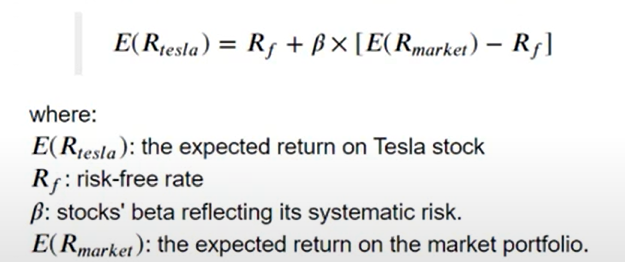

In [63]:
TSLA_excess_ret = data['Ret'] - data['RF'] # Ret è il ritorno mensile di tesla, RF è il ritorno del risk-free

In [64]:
data['TSLA-RF'] = TSLA_excess_ret # aggiungiamo al dataframe la colonna che rappresenta l'eccesso di ritorno di tesla

C:\Users\utente\AppData\Local\Temp\ipykernel_16064\456726853.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TSLA-RF'] = TSLA_excess_ret # aggiungiamo al dataframe la colonna che rappresenta l'eccesso di ritorno di tesla


In [65]:
data.head()

,Mkt-RF,SMB,HML,RF,Adj Close,Ret,TSLA-RF
Date,,,,,,,
2019-04-30,0.0397,-0.0174,0.0215,0.0021,15.912667,-0.147109,-0.149209
2019-05-31,-0.0694,-0.0132,-0.0237,0.0021,12.344000,-0.224266,-0.226366
2019-06-30,0.0693,0.0029,-0.0071,0.0018,14.897333,0.206848,0.205048
2019-07-31,0.0119,-0.0193,0.0048,0.0019,16.107332,0.081223,0.079323
2019-08-31,-0.0258,-0.0238,-0.0478,0.0016,15.040667,-0.066222,-0.067822


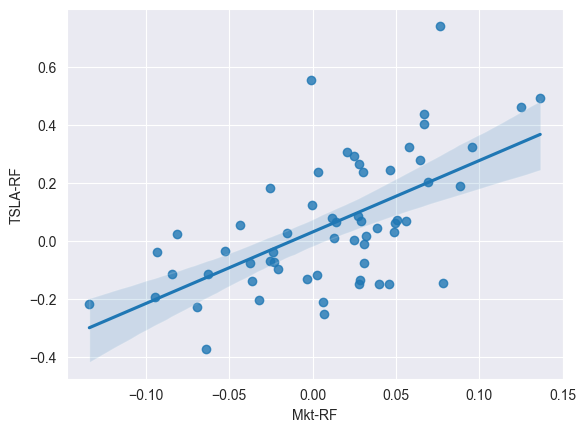

In [66]:
sns.regplot(x = 'Mkt-RF', y='TSLA-RF', data = data)
plt.grid(axis='both')
plt.grid()

Tra l'eccesso di ritorno di Tesla e quello del mercato sussiste una relazione lineare: grosso modo quando il mercato sale, anche tesla sale. <br>
La banda azzurra è l'intervallo di confidenza.

In [67]:
X = data['Mkt-RF']
Y = data['TSLA-RF']
X1 = sm.add_constant(X)
X

Date
2019-04-30    0.0397
2019-05-31   -0.0694
2019-06-30    0.0693
2019-07-31    0.0119
2019-08-31   -0.0258
2019-09-30    0.0143
2019-10-31    0.0206
2019-11-30    0.0387
2019-12-31    0.0277
2020-01-31   -0.0011
2020-02-29   -0.0813
2020-03-31   -0.1339
2020-04-30    0.1365
2020-05-31    0.0558
2020-06-30    0.0246
2020-07-31    0.0577
2020-08-31    0.0763
2020-09-30   -0.0363
2020-10-31   -0.0210
2020-11-30    0.1247
2020-12-31    0.0463
2021-01-31   -0.0003
2021-02-28    0.0278
2021-03-31    0.0308
2021-04-30    0.0493
2021-05-31    0.0029
2021-06-30    0.0275
2021-07-31    0.0127
2021-08-31    0.0291
2021-09-30   -0.0437
2021-10-31    0.0665
2021-11-30   -0.0155
2021-12-31    0.0310
2022-01-31   -0.0625
2022-02-28   -0.0229
2022-03-31    0.0305
2022-04-30   -0.0946
2022-05-31   -0.0034
2022-06-30   -0.0843
2022-07-31    0.0957
2022-08-31   -0.0377
2022-09-30   -0.0935
2022-10-31    0.0783
2022-11-30    0.0460
2022-12-31   -0.0641
2023-01-31    0.0665
2023-02-28   -0.0258
2023-03-

In [68]:
X1

,const,Mkt-RF
Date,,
2019-04-30,1.0,0.0397
2019-05-31,1.0,-0.0694
2019-06-30,1.0,0.0693
2019-07-31,1.0,0.0119
2019-08-31,1.0,-0.0258
2019-09-30,1.0,0.0143
2019-10-31,1.0,0.0206
2019-11-30,1.0,0.0387
2019-12-31,1.0,0.0277


In [70]:
model = sm.OLS(Y,X1)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                TSLA-RF   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     33.15
Date:                Wed, 15 May 2024   Prob (F-statistic):           3.41e-07
Time:                        11:47:12   Log-Likelihood:                 18.503
No. Observations:                  60   AIC:                            -33.01
Df Residuals:                      58   BIC:                            -28.82
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0311      0.024      1.305      0.197      -0.017       0.079
Mkt-RF         2.4645      0.428      5.758      0.000       1.608       3.321
==============================================================================
Omnibus:                        5.006   Durbin-Watson:                   1.434
Prob(Omnibus):                  0.082   Jarque-Bera (JB):                4.076
Skew:                           0.503   Prob(JB):                        0.130
Kurtosis:                       3.787   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__NB__: se t > 2 allora il dato è significativo, mentre se t < 2 allora il dato non è significativo (in questo caso il beta è significativo, mentre la costante no)

In [71]:
intercept, beta = results.params

In [72]:
intercept

0.031098071568590978

In [73]:
beta

2.464465735373866

#### Calcoliamo il rendimento atteso di TESLA

In [74]:
# Per il risk free prendiamo il tasso corrente non quello passato.
# In questo momento i tassi sono intorno al 5% annuale, diviso 12 è pari a 0,417%
risk_free = 0.00417

CONTINUA MINUTO 30 della REC

In [75]:
# Per il mercato possiamo prendere o la nostra stima o una media di lungo periodo.
# Ipotizziamo 7% diviso 12 pari a 0,5%
market_premium = 0.0058

In [76]:
# Se prendiamo la media recente viene un numero altissimo
data['Mkt-RF'].mean()*12

0.13357999999999995

In [77]:
# Rendimento atteso di TESLA
TESLA_exp_ret = risk_free + beta*market_premium
TESLA_exp_ret


0.01846390126516842

In [78]:
TESLA_exp_ret_y = TESLA_exp_ret * 12
TESLA_exp_ret_y

0.22156681518202104